# Introduction 

In [104]:
local_crs = 3414

place = "singapore"

# Objectives

My main task is to cluster the countries by the factors mentioned above and then present the solution. The following approach is suggested :

- Start off with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis etc.




- **Outlier Analysis:** We must perform the Outlier Analysis on the dataset. However, We do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all we need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results We get.


- Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and We might have to choose one of them for the final list of countries.]


- Analyse the clusters and identify the ones which are in dire need of aid. We can analyse the clusters by comparing how these three variables - [**gdpp, child_mort and income**] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.


- Also, We need to perform visualisations on the clusters that have been formed.  We can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. Make sure We create visualisations for all the three pairs. We can also choose other types of plots like boxplots, etc. 


- Both K-means and Hierarchical may give different results because of previous analysis (whether We chose to keep or remove the outliers, how many clusters We chose,  etc.) Hence, there might be some subjectivity in the final number of countries that We think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that We report back at least 5 countries which are in direst need of aid from the analysis work that we perform.

# Data Collected / Received

The datasets containing those socio-economic factors and the corresponding data dictionary are provided.

In [105]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [106]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [108]:
# Data display coustomization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [109]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [110]:
# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from bokeh.plotting import figure, show

In [111]:
from clustergram import Clustergram

# Data Preparation

## Data Loading

In [112]:
import geopandas as gpd

In [113]:
tessellation_raw = gpd.read_parquet(f"./out/{place}/tessellation_stats.pq")

tessellation_raw['uID'] = tessellation_raw['uID'].astype(str)

tessellation = tessellation_raw.drop(columns=['geometry'])

In [114]:
tessellation.head()

,uID,convexity,area_x,neighbours,neighbours400,covered_area,mean_area,mean_area_iq,area_rng,area_iqr,rea_theil,shannon,orientation_x,car,area_y,circular_com,elongation,squareness,eri,orientation_y,weighted_circom,neighbour_dist,interbuilding_distance,mean_ib_dist,linearity,width,width_deviation,openness,1000,cell_align,betweeness_centrality_left,node_degree,closeness,global_closeness_centrality,global_clustering_400m,eigenvector,node_centrality_400m,betweeness_centrality_right,clusterID
0,0,0.778496,585711.694415,17,2,887932.927408,51916.126560,4445.285185,585566.110786,17897.582094,1.784848,0.960892,42.990501,0.000232,135.936426,0.632538,0.896277,0.028693,1.000012,0.004613,0.457827,112.383673,47.746951,47.746951,1.0,50.0,0.0,1.0,1209.521221,42.985888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,1,0.997793,240705.502857,11,2,860354.703682,77335.595966,10483.520085,584213.722392,27381.991672,1.422985,1.234268,4.544136,0.003908,940.600377,0.523132,0.523543,0.012337,1.000018,0.245322,0.483648,37.546588,65.561475,65.561475,1.0,50.0,0.0,1.0,1210.822835,4.298814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2,0.948822,33937.506410,19,2,912386.713892,46870.170177,2190.017402,585566.110786,8029.763386,1.870591,0.895380,16.579217,0.098019,3326.535481,0.608176,0.737375,0.000006,1.000000,0.004602,0.457561,132.864279,45.749431,45.749431,1.0,50.0,0.0,1.0,1136.213099,16.574615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,3,0.978591,27578.223725,21,10,684885.630835,44656.445630,3987.661044,585566.110786,17980.464103,1.827191,0.948588,33.779758,0.051221,1412.582668,0.493066,0.474393,0.012235,1.000018,0.451083,0.414365,112.177754,43.294948,43.294948,1.0,50.0,0.0,1.0,929.534974,33.328675,0.0,1.0,0.0,0.000029,0.0,52156.0,8.0,0.00003,2
4,4,0.957231,4643.226309,21,11,67487.675763,44656.445630,3987.661044,585566.110786,17980.464103,1.827191,0.948588,1.835183,0.304258,1412.739688,0.493120,0.474631,0.009556,0.999984,0.451164,0.414365,86.331456,43.294948,43.294948,1.0,50.0,0.0,1.0,922.457335,1.384019,0.0,1.0,0.0,0.000029,0.0,52156.0,8.0,0.00003,2


## Data Dictionary

## Duplicate Check

In [115]:
tessellation_dub = tessellation.copy()

# Checking for duplicates and dropping the entire duplicate row if any
tessellation_dub.drop_duplicates(subset=None, inplace=True)


In [116]:
tessellation_dub.shape

(75039, 39)

In [117]:
tessellation.shape

(75039, 39)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

## Data Inspection

In [118]:
tessellation.shape

(75039, 39)

In [119]:
tessellation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75039 entries, 0 to 75038
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uID                          75039 non-null  object 
 1   convexity                    75039 non-null  float64
 2   area_x                       75039 non-null  float64
 3   neighbours                   75039 non-null  int64  
 4   neighbours400                75039 non-null  int64  
 5   covered_area                 75039 non-null  float64
 6   mean_area                    75039 non-null  float64
 7   mean_area_iq                 75039 non-null  float64
 8   area_rng                     75039 non-null  float64
 9   area_iqr                     75039 non-null  float64
 10  rea_theil                    75039 non-null  float64
 11  shannon                      75039 non-null  float64
 12  orientation_x                75039 non-null  float64
 13  car             

In [120]:
tessellation.describe()

,convexity,area_x,neighbours,neighbours400,covered_area,mean_area,mean_area_iq,area_rng,area_iqr,rea_theil,shannon,orientation_x,car,area_y,circular_com,elongation,squareness,eri,orientation_y,weighted_circom,neighbour_dist,interbuilding_distance,mean_ib_dist,linearity,width,width_deviation,openness,1000,cell_align,betweeness_centrality_left,node_degree,closeness,global_closeness_centrality,global_clustering_400m,eigenvector,node_centrality_400m,betweeness_centrality_right,clusterID
count,75039.000000,7.503900e+04,75039.000000,75039.000000,7.503900e+04,7.503900e+04,7.503900e+04,7.503900e+04,75039.000000,75039.000000,75039.000000,75039.000000,75039.000000,75039.000000,75039.000000,75039.000000,7.503800e+04,75039.000000,75039.000000,75039.000000,75029.000000,75039.000000,75039.000000,75039.000000,75039.000000,75039.000000,75039.000000,75039.000000,75039.000000,73530.000000,73530.000000,73530.000000,73530.000000,73122.000000,73530.000000,73530.000000,73544.000000,75039.000000
mean,0.925014,7.343193e+03,92.648276,50.371700,7.810045e+04,8.642282e+03,4.405808e+03,9.904746e+04,6143.107511,0.609888,0.484782,21.332464,0.297485,1109.345615,0.474461,0.593654,4.347826e+00,0.906974,20.334850,0.427725,48.712681,51.192885,51.192885,0.962616,38.922070,1.817102,0.750406,111.034367,7.878185,0.001990,2.271100,0.039985,0.000069,0.057510,33866.492887,52.479723,0.001843,2.495769
std,0.063982,3.683012e+04,42.038882,43.124086,1.644122e+05,1.699863e+04,9.272608e+03,2.361822e+05,16139.519520,0.441334,0.356895,13.381529,0.186309,2518.831818,0.149054,0.230524,1.188873e+01,0.159720,13.875153,0.073785,49.383234,32.380425,32.380425,0.148034,11.441131,2.013649,0.251233,534.722487,8.950565,0.005861,0.709884,0.081186,0.000014,0.080801,20402.222546,32.604631,0.005674,1.707621
min,0.179915,1.806290e+01,0.000000,0.000000,2.553828e+02,2.553828e+02,2.553828e+02,0.000000e+00,0.000000,0.000000,-0.000000,0.000029,0.000006,1.953634,0.021267,0.019930,1.199677e-07,0.107840,0.000006,0.087067,0.987652,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000029,0.000000,9.000000,0.000000,0.000000,0.000000
25%,0.897675,9.757128e+02,62.000000,18.000000,2.560429e+04,2.127920e+03,1.217755e+03,1.887609e+04,1253.477955,0.311767,0.166268,9.475269,0.170952,254.377348,0.370333,0.412705,1.524600e-01,0.873804,7.617328,0.377742,30.076671,33.953483,33.953483,0.998883,28.747759,0.000000,0.555556,10.824515,1.346539,0.000059,2.000000,0.011679,0.000059,0.000000,17952.000000,28.000000,0.000046,1.000000
50%,0.941525,2.371945e+03,85.000000,33.000000,4.318346e+04,5.064359e+03,2.894318e+03,3.608004e+04,3113.975216,0.491191,0.462377,20.698944,0.282960,486.562260,0.500741,0.595894,3.149045e-01,0.999956,19.776383,0.429425,36.149203,41.077274,41.077274,1.000000,42.770604,1.237866,0.821429,18.307919,4.452573,0.000284,2.000000,0.024508,0.000071,0.000000,31104.000000,46.000000,0.000244,2.000000
75%,0.970609,5.606872e+03,118.000000,76.000000,7.462257e+04,8.702953e+03,5.385976e+03,8.081387e+04,5759.927400,0.769883,0.733944,33.071616,0.402404,1180.384651,0.590907,0.781304,4.370731e-01,1.000229,32.646923,0.476467,49.188555,54.842638,54.842638,1.000000,50.000000,3.243322,1.000000,41.529161,11.156703,0.001090,3.000000,0.043666,0.000080,0.095745,48780.000000,71.000000,0.000967,4.000000
max,1.000000,3.346744e+06,354.000000,296.000000,6.786890e+06,1.100541e+06,1.100541e+06,3.346631e+06,657679.331943,3.875544,1.922555,44.998944,8.925426,177457.477696,0.992051,0.999993,8.461558e+01,1.128085,44.999311,0.974756,1817.370535,837.442654,837.442654,1.000000,50.000000,11.813547,1.000000,12692.400172,44.997793,0.106086,5.000000,2.089181,0.000093,0.600000,79600.000000,213.000000,0.106095,5.000000


## Data Cleaning

### Deal with null values


In [121]:
tessellation["squareness"].fillna(0, inplace=True)
tessellation["neighbour_dist"].fillna(5000, inplace=True)
tessellation["betweeness_centrality_left"].fillna(0, inplace=True)
tessellation["node_degree"].fillna(0, inplace=True)
tessellation["closeness"].fillna(0, inplace=True)
tessellation["global_closeness_centrality"].fillna(0, inplace=True)
tessellation["global_clustering_400m"].fillna(0, inplace=True)
tessellation["eigenvector"].fillna(0, inplace=True)
tessellation["node_centrality_400m"].fillna(0, inplace=True)
tessellation["betweeness_centrality_right"].fillna(0, inplace=True)

### Null Percentage: Columns

In [122]:
(tessellation.isnull().sum() * 100 / len(tessellation)).value_counts(ascending=False)

0.0    39
dtype: int64

### Null Count: Columns

In [123]:
tessellation.isnull().sum().value_counts(ascending=False)

0    39
dtype: int64

### Null Percentage: Rows

In [124]:
(tessellation.isnull().sum(axis=1) * 100 / len(tessellation)).value_counts(ascending=False)

0.0    75039
dtype: int64

### Null Count: Rows

In [125]:
tessellation.isnull().sum(axis=1).value_counts(ascending=False)

0    75039
dtype: int64

There are no missing / Null values either in columns or rows

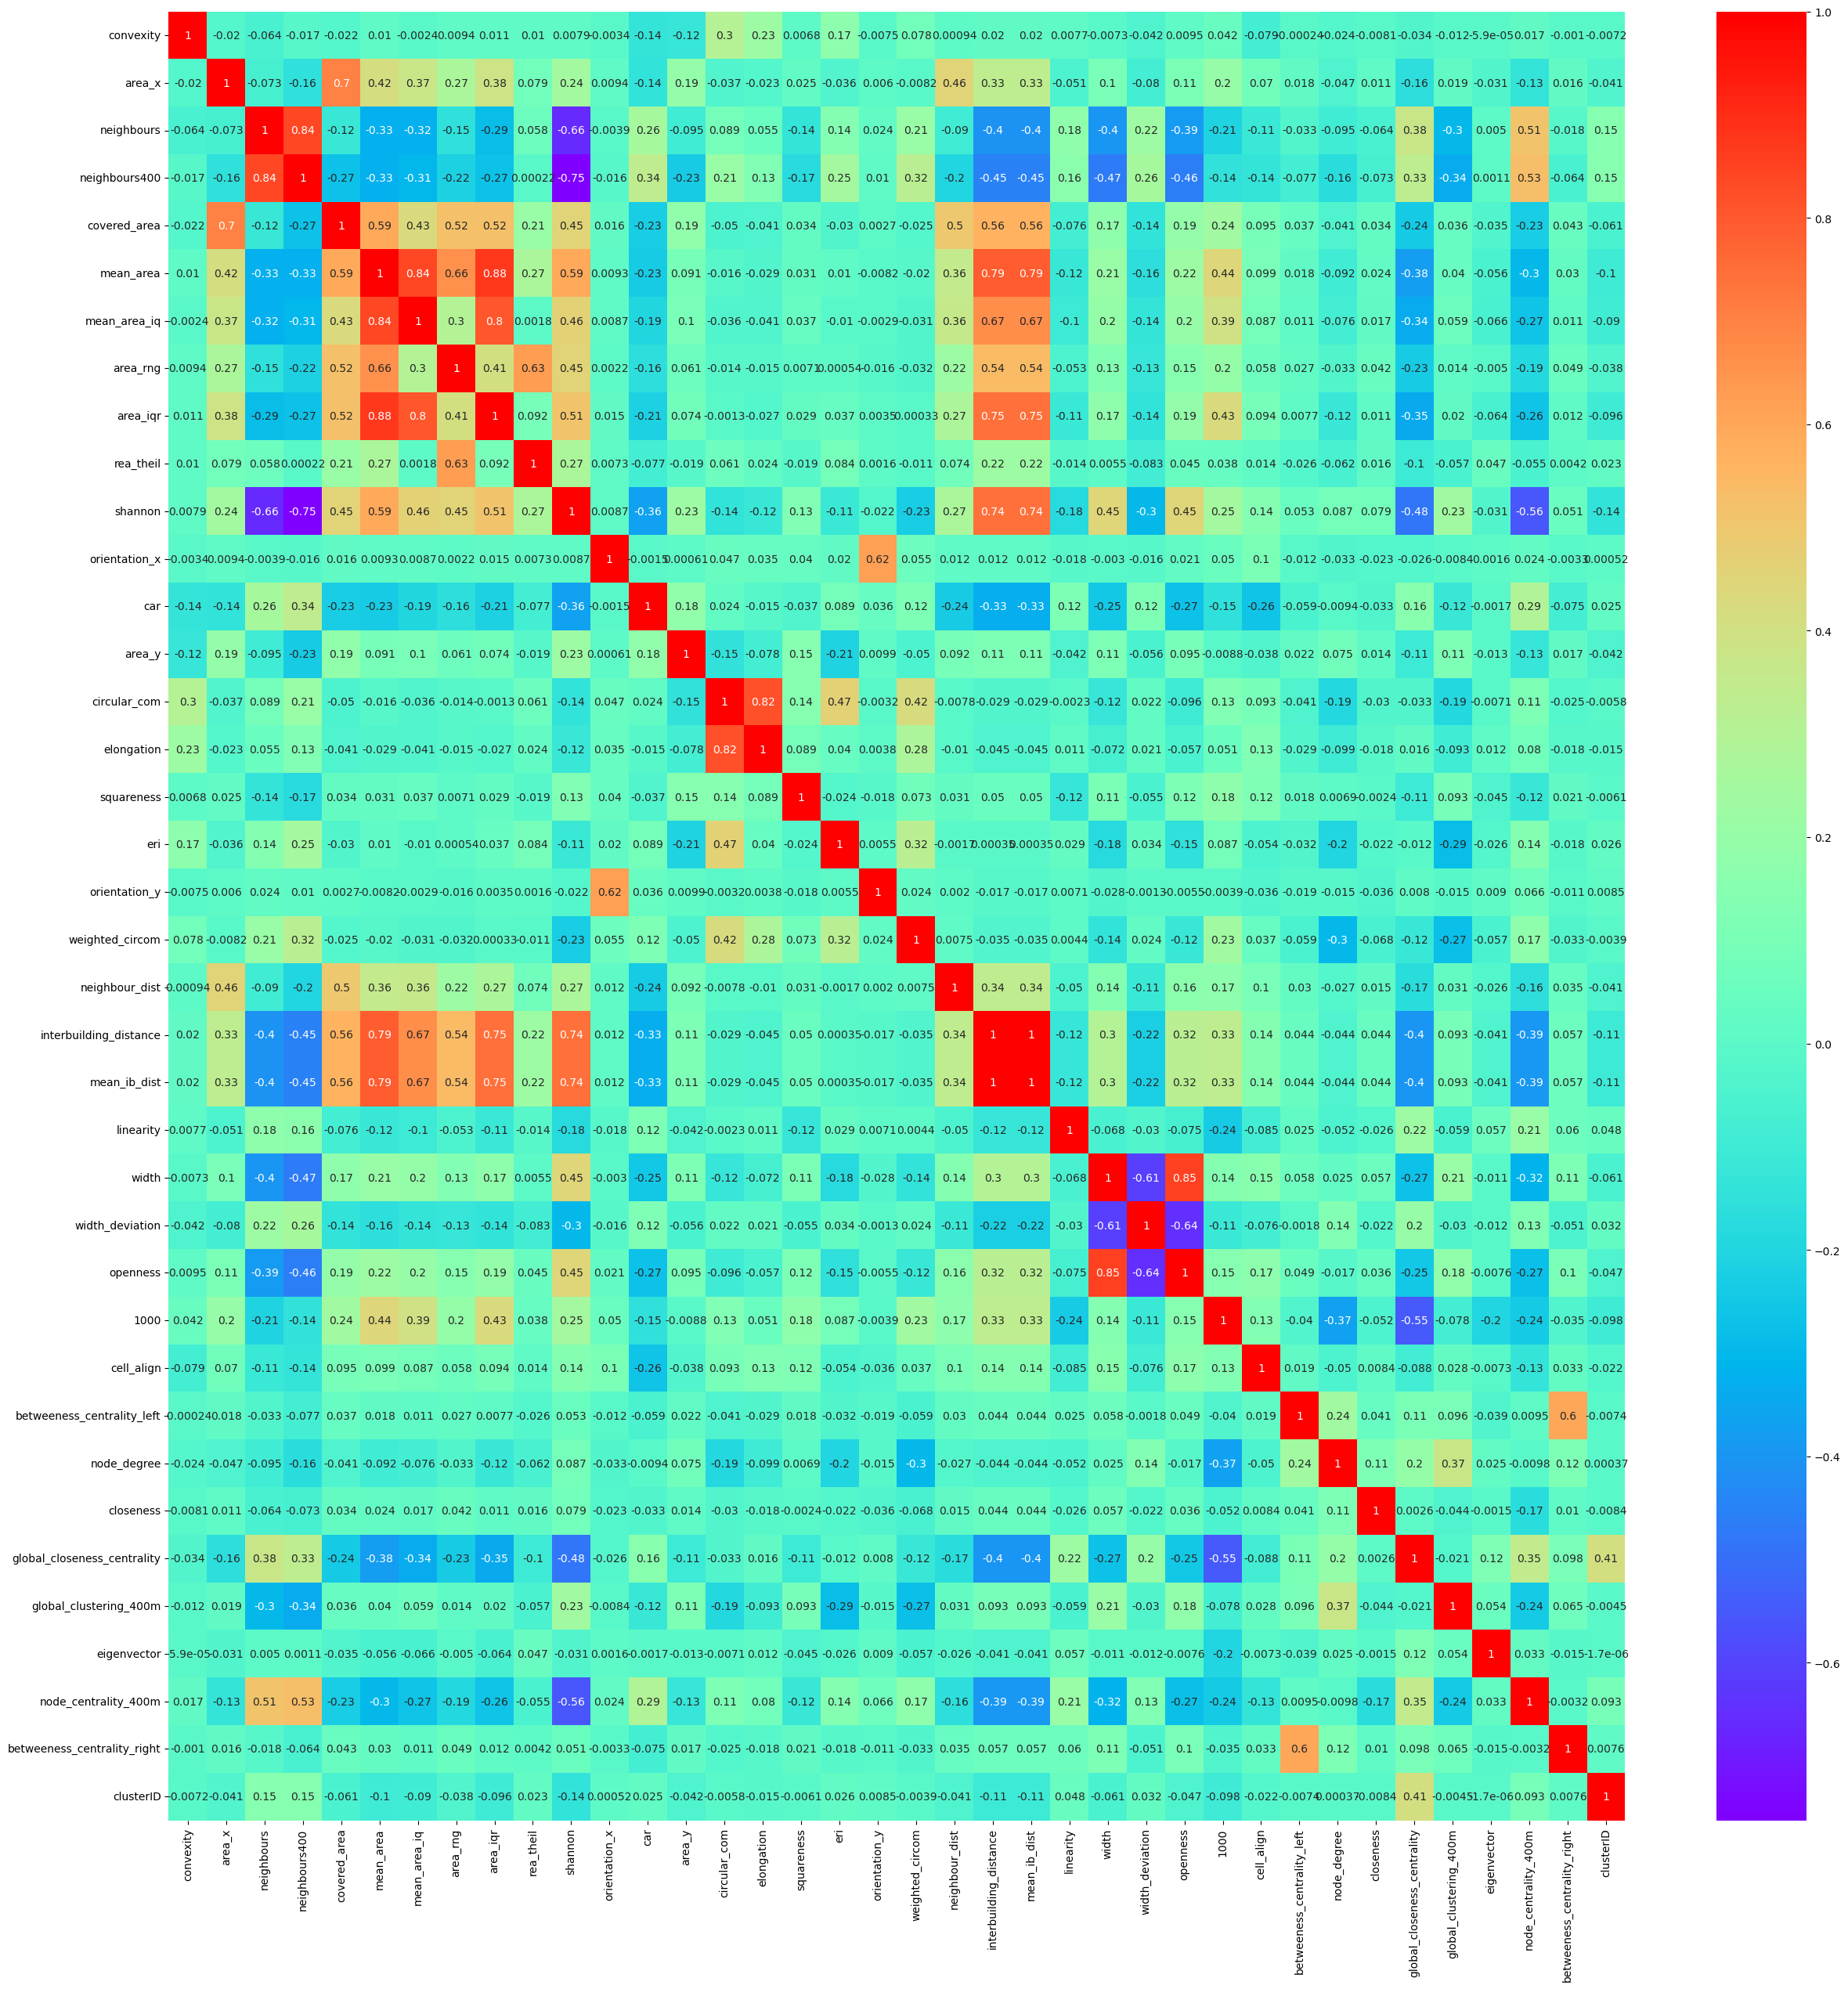

In [126]:
plt.figure(figsize = (30, 30))
sns.heatmap(tessellation.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

## Data Preparation

In [127]:
tessellation_drop = tessellation.copy()
country = tessellation_drop.pop('uID')
tessellation_drop.head()

,convexity,area_x,neighbours,neighbours400,covered_area,mean_area,mean_area_iq,area_rng,area_iqr,rea_theil,shannon,orientation_x,car,area_y,circular_com,elongation,squareness,eri,orientation_y,weighted_circom,neighbour_dist,interbuilding_distance,mean_ib_dist,linearity,width,width_deviation,openness,1000,cell_align,betweeness_centrality_left,node_degree,closeness,global_closeness_centrality,global_clustering_400m,eigenvector,node_centrality_400m,betweeness_centrality_right,clusterID
0,0.778496,585711.694415,17,2,887932.927408,51916.126560,4445.285185,585566.110786,17897.582094,1.784848,0.960892,42.990501,0.000232,135.936426,0.632538,0.896277,0.028693,1.000012,0.004613,0.457827,112.383673,47.746951,47.746951,1.0,50.0,0.0,1.0,1209.521221,42.985888,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,2
1,0.997793,240705.502857,11,2,860354.703682,77335.595966,10483.520085,584213.722392,27381.991672,1.422985,1.234268,4.544136,0.003908,940.600377,0.523132,0.523543,0.012337,1.000018,0.245322,0.483648,37.546588,65.561475,65.561475,1.0,50.0,0.0,1.0,1210.822835,4.298814,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,2
2,0.948822,33937.506410,19,2,912386.713892,46870.170177,2190.017402,585566.110786,8029.763386,1.870591,0.895380,16.579217,0.098019,3326.535481,0.608176,0.737375,0.000006,1.000000,0.004602,0.457561,132.864279,45.749431,45.749431,1.0,50.0,0.0,1.0,1136.213099,16.574615,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,2
3,0.978591,27578.223725,21,10,684885.630835,44656.445630,3987.661044,585566.110786,17980.464103,1.827191,0.948588,33.779758,0.051221,1412.582668,0.493066,0.474393,0.012235,1.000018,0.451083,0.414365,112.177754,43.294948,43.294948,1.0,50.0,0.0,1.0,929.534974,33.328675,0.0,1.0,0.0,0.000029,0.0,52156.0,8.0,0.00003,2
4,0.957231,4643.226309,21,11,67487.675763,44656.445630,3987.661044,585566.110786,17980.464103,1.827191,0.948588,1.835183,0.304258,1412.739688,0.493120,0.474631,0.009556,0.999984,0.451164,0.414365,86.331456,43.294948,43.294948,1.0,50.0,0.0,1.0,922.457335,1.384019,0.0,1.0,0.0,0.000029,0.0,52156.0,8.0,0.00003,2


## Rescaling the Features

Most software packages use SVD to compute the principal components and assume that the data is scaled and centred, so it is important to do standardisation/normalisation. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)


Here, we will use Standardisation Scaling.

In [128]:
# Standarisation technique for scaling
scaler = StandardScaler()
tessellation_scaled = scaler.fit_transform(tessellation_drop)

In [129]:
tessellation_scaled

array([[-2.28998320e+00,  1.57037868e+01, -1.79949555e+00, ...,
        -1.55337237e+00, -3.21178924e-01, -2.90329234e-01],
       [ 1.13749454e+00,  6.33622326e+00, -1.94222151e+00, ...,
        -1.55337237e+00, -3.21178924e-01, -2.90329234e-01],
       [ 3.72106808e-01,  7.22085347e-01, -1.75192022e+00, ...,
        -1.55337237e+00, -3.21178924e-01, -2.90329234e-01],
       ...,
       [-3.50239277e-01,  5.95461928e+00, -2.10873514e+00, ...,
        -1.55337237e+00, -3.21178924e-01, -1.46155741e+00],
       [ 4.74232978e-02,  8.27581383e+01, -1.27616701e+00, ...,
        -1.55337237e+00, -3.21178924e-01, -1.46155741e+00],
       [-1.95100258e+00,  4.70018972e+01, -1.58540660e+00, ...,
        -1.55337237e+00, -3.21178924e-01, -1.46155741e+00]])

## PCA Application

We are doing PCA because we want to remove the redundancies in the data and find the most important directions where the data was aligned. A somewhat similar heuristic is also used by the United Nations to calculate the Human Development Index(HDI) to rank countries on the basis of their development.

Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. By converting large data sets into smaller ones containing fewer variables, it helps in improving model performance, visualising complex data sets, and in many more areas.

Let's use PCA for dimensionality reduction as from the heatmap it is evident that correlation exists between the attributes.

In [130]:
pca = PCA(svd_solver='randomized', random_state=50)


In [131]:
# Lets apply PCA on the scaled data

pca.fit(tessellation_scaled)

PCA(random_state=50, svd_solver='randomized')

In [132]:
# PCA components created 

pca.components_

array([[ 3.38656981e-03,  1.63113564e-01, -2.13283367e-01, ...,
        -1.97300977e-01,  2.33944129e-02, -6.28115974e-02],
       [ 9.88748649e-02,  1.18389301e-01,  2.07404516e-01, ...,
         1.39178586e-01, -8.32613315e-02, -1.83627040e-03],
       [-1.89612662e-01,  2.01135180e-01,  1.98020877e-01, ...,
         1.05044762e-01,  5.02845442e-02,  9.14696930e-02],
       ...,
       [ 2.92917828e-02, -1.92343601e-03, -2.79208616e-02, ...,
        -5.95517699e-03, -9.94298509e-05,  6.47089301e-03],
       [-3.19083803e-05, -5.56112523e-03,  4.71143517e-02, ...,
        -6.32784326e-03, -3.74489054e-03,  1.89006031e-02],
       [-0.00000000e+00,  2.64471165e-16, -3.07593968e-16, ...,
         2.97164443e-16,  7.52602545e-17,  8.92437501e-17]])

In [133]:
# Variance Ratio

pca.explained_variance_ratio_

array([2.09971473e-01, 8.85236397e-02, 6.23439462e-02, 4.84986889e-02,
       4.45215391e-02, 4.28097868e-02, 3.99379786e-02, 3.66939257e-02,
       3.44123693e-02, 3.24249460e-02, 2.92964166e-02, 2.78363373e-02,
       2.70445443e-02, 2.44893581e-02, 2.29447963e-02, 2.14691871e-02,
       2.05712506e-02, 1.88238976e-02, 1.75598637e-02, 1.66892976e-02,
       1.49223928e-02, 1.44020704e-02, 1.25394249e-02, 1.17408066e-02,
       1.09856190e-02, 1.04265322e-02, 9.73765409e-03, 9.51041490e-03,
       8.67253770e-03, 7.41945530e-03, 5.76526237e-03, 4.21638606e-03,
       3.72551545e-03, 3.50683295e-03, 2.69947244e-03, 1.88215457e-03,
       9.84225391e-04, 1.19678914e-33])

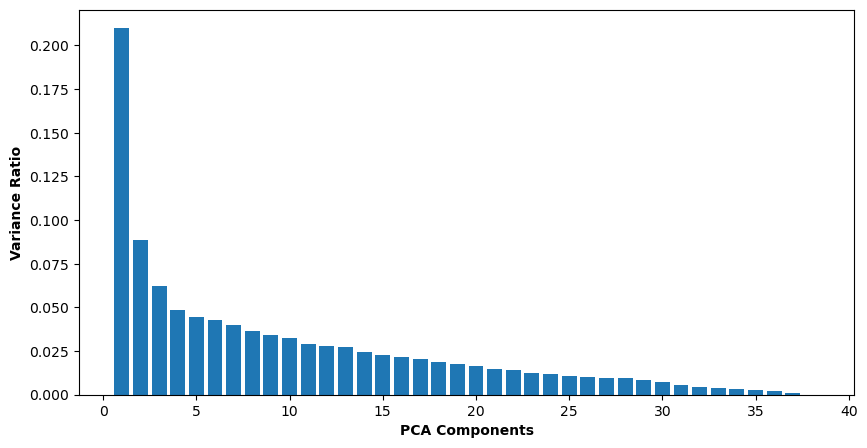

In [134]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize = (10, 5))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

plt.show()

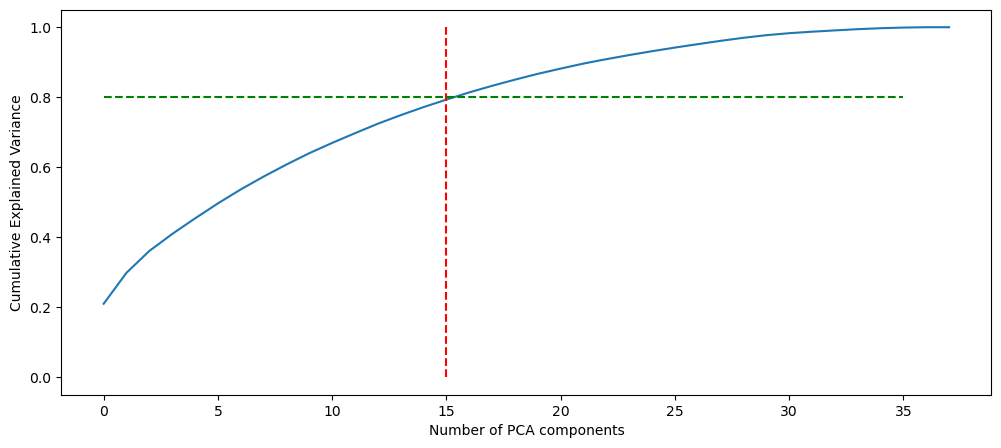

In [135]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.8, xmax=35, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

15 PCA explains 80% of variance, will use that

In [136]:
tessellation

,uID,convexity,area_x,neighbours,neighbours400,covered_area,mean_area,mean_area_iq,area_rng,area_iqr,rea_theil,shannon,orientation_x,car,area_y,circular_com,elongation,squareness,eri,orientation_y,weighted_circom,neighbour_dist,interbuilding_distance,mean_ib_dist,linearity,width,width_deviation,openness,1000,cell_align,betweeness_centrality_left,node_degree,closeness,global_closeness_centrality,global_clustering_400m,eigenvector,node_centrality_400m,betweeness_centrality_right,clusterID
0,0,0.778496,5.857117e+05,17,2,8.879329e+05,51916.126560,4445.285185,5.855661e+05,17897.582094,1.784848,0.960892,42.990501,0.000232,135.936426,0.632538,0.896277,0.028693,1.000012,0.004613,0.457827,112.383673,47.746951,47.746951,1.000000,50.0,0.0,1.0,1209.521221,42.985888,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,2
1,1,0.997793,2.407055e+05,11,2,8.603547e+05,77335.595966,10483.520085,5.842137e+05,27381.991672,1.422985,1.234268,4.544136,0.003908,940.600377,0.523132,0.523543,0.012337,1.000018,0.245322,0.483648,37.546588,65.561475,65.561475,1.000000,50.0,0.0,1.0,1210.822835,4.298814,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,2
2,2,0.948822,3.393751e+04,19,2,9.123867e+05,46870.170177,2190.017402,5.855661e+05,8029.763386,1.870591,0.895380,16.579217,0.098019,3326.535481,0.608176,0.737375,0.000006,1.000000,0.004602,0.457561,132.864279,45.749431,45.749431,1.000000,50.0,0.0,1.0,1136.213099,16.574615,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,2
3,3,0.978591,2.757822e+04,21,10,6.848856e+05,44656.445630,3987.661044,5.855661e+05,17980.464103,1.827191,0.948588,33.779758,0.051221,1412.582668,0.493066,0.474393,0.012235,1.000018,0.451083,0.414365,112.177754,43.294948,43.294948,1.000000,50.0,0.0,1.0,929.534974,33.328675,0.0,1.0,0.0,0.000029,0.0,52156.0,8.0,0.00003,2
4,4,0.957231,4.643226e+03,21,11,6.748768e+04,44656.445630,3987.661044,5.855661e+05,17980.464103,1.827191,0.948588,1.835183,0.304258,1412.739688,0.493120,0.474631,0.009556,0.999984,0.451164,0.414365,86.331456,43.294948,43.294948,1.000000,50.0,0.0,1.0,922.457335,1.384019,0.0,1.0,0.0,0.000029,0.0,52156.0,8.0,0.00003,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75034,75034,0.775146,7.731463e+03,4,1,2.780585e+05,183362.304014,212917.677156,2.625956e+05,54221.613877,0.196490,0.500402,14.216201,0.005134,39.690878,0.629090,0.901345,0.412677,1.000151,43.792670,0.814520,30.448825,386.672827,386.672827,0.901753,50.0,0.0,1.0,3776.895441,29.576469,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0
75035,75035,0.992504,7.336948e+05,7,2,1.190246e+06,301425.255598,241501.489096,7.242112e+05,528973.183959,0.463744,1.559581,37.776419,0.000458,336.307821,0.464837,0.457950,1.971564,0.995898,25.615207,0.497984,255.553074,263.528434,263.528434,0.901753,50.0,0.0,1.0,9574.652097,12.161211,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0
75036,75036,0.902605,2.266511e+05,4,0,9.090801e+05,183362.304014,212917.677156,2.625956e+05,54221.613877,0.196490,0.500402,37.992753,0.000731,165.647501,0.573270,0.728088,4.221659,1.002782,14.095987,0.814520,570.809431,386.672827,386.672827,0.901753,50.0,0.0,1.0,4389.712350,23.896767,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0
75037,75037,0.928048,3.055315e+06,39,0,6.786890e+06,274866.779122,108076.429181,3.054313e+06,197473.586319,1.000884,1.752424,7.346464,0.000035,105.540621,0.628019,0.970641,3.896747,0.998399,12.464579,0.449971,1563.825030,401.226969,401.226969,0.901753,50.0,0.0,1.0,7030.133955,5.118114,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0


In [137]:
# Checking which attributes are well explained by the pca components

org_col = list(tessellation.drop(['uID'],axis=1).columns)

num_pc = 15

pc_dict = {'Attribute': org_col}

pc_dict.update({f'PC_{i+1}':pca.components_[i] for i in range(num_pc)})

attributes_pca = pd.DataFrame(pc_dict)

In [138]:
attributes_pca

,Attribute,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15
0,convexity,0.003387,0.098875,-0.189613,0.177592,-0.175554,-0.013753,-0.152702,-0.021067,0.181115,0.228033,0.245343,0.126912,0.415748,-0.004422,-0.023115
1,area_x,0.163114,0.118389,0.201135,0.048672,0.102339,0.071208,0.214802,0.385265,0.056370,-0.023893,0.241303,0.061392,0.109162,0.054641,-0.000085
2,neighbours,-0.213283,0.207405,0.198021,0.094482,0.199365,-0.056102,0.089464,0.079195,-0.039947,-0.116367,-0.013009,-0.036149,-0.013072,-0.131945,0.185734
3,neighbours400,-0.238160,0.266051,0.120961,0.038604,0.129930,-0.071999,0.076481,-0.032685,0.011760,-0.063739,-0.054056,-0.032240,-0.034754,-0.125590,0.224073
4,covered_area,0.229543,0.128962,0.218005,0.096722,0.095852,0.030270,0.079464,0.286725,-0.020956,-0.050654,0.175571,0.043213,0.079848,0.025940,-0.012888
5,mean_area,0.294519,0.179183,0.158896,0.002894,-0.021213,-0.007142,-0.016152,-0.095824,0.044384,0.090449,-0.136008,-0.038168,-0.043663,-0.078641,0.089944
6,mean_area_iq,0.253342,0.133646,0.113572,-0.076584,-0.051761,0.053372,0.155026,-0.098643,0.224432,0.183579,-0.156404,-0.005121,-0.093964,-0.054173,0.108831
7,area_rng,0.201918,0.133378,0.181001,0.153562,0.060523,-0.110671,-0.309268,-0.003071,-0.296258,-0.102026,-0.033086,-0.062007,0.064342,-0.097268,0.001591
8,area_iqr,0.265372,0.178936,0.127237,-0.048990,-0.038800,0.027963,0.084013,-0.130986,0.165558,0.148019,-0.170356,-0.019669,-0.088404,-0.057353,0.106123
9,rea_theil,0.081275,0.120131,0.113207,0.177145,0.110100,-0.167278,-0.453870,-0.001193,-0.403824,-0.203853,-0.004658,-0.072402,0.108158,-0.046226,-0.009508


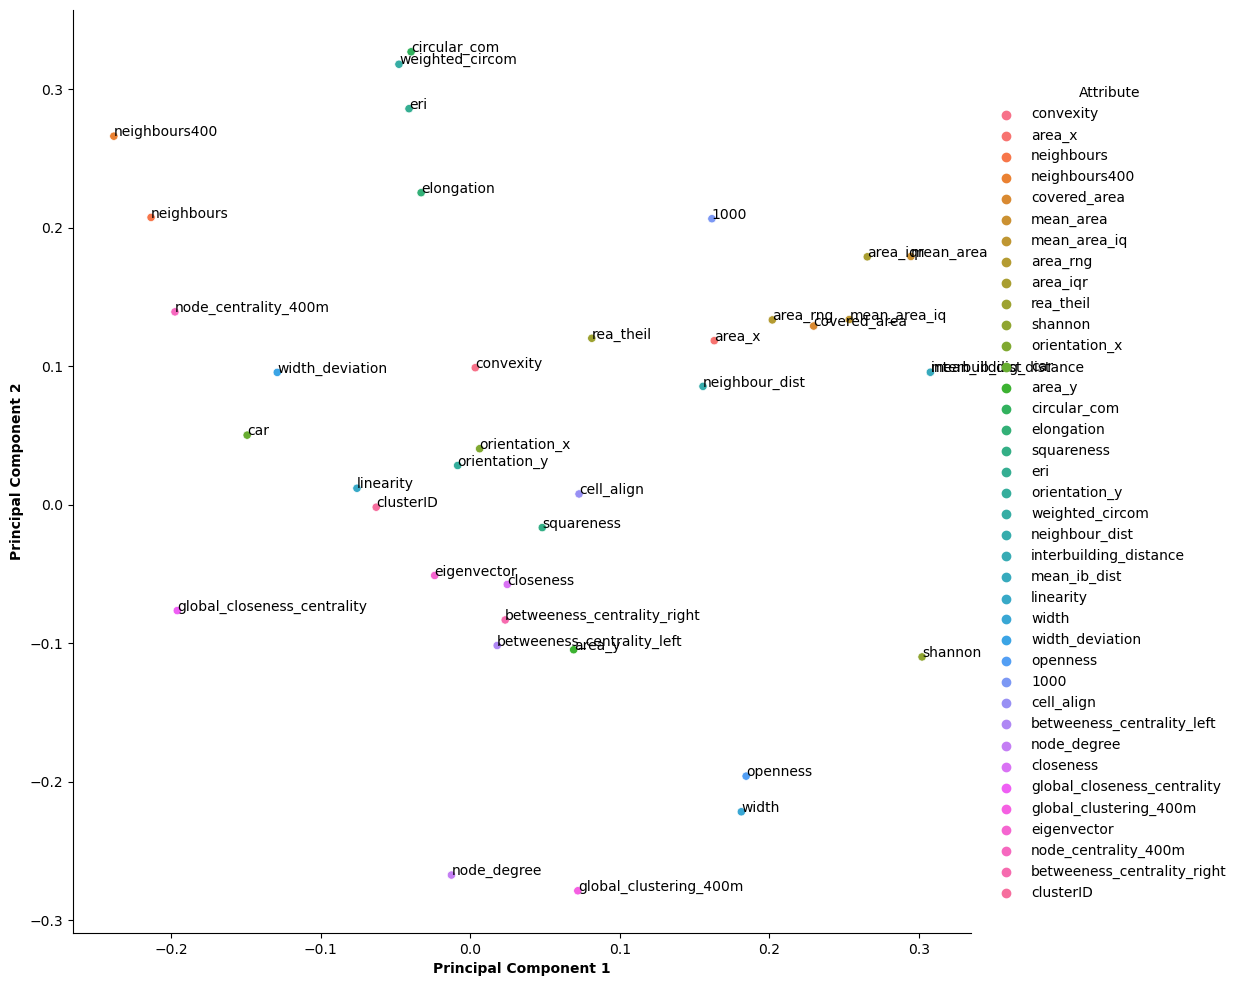

In [139]:
# Plotting the above dataframe for better visualization with PC1 and PC2

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=10)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

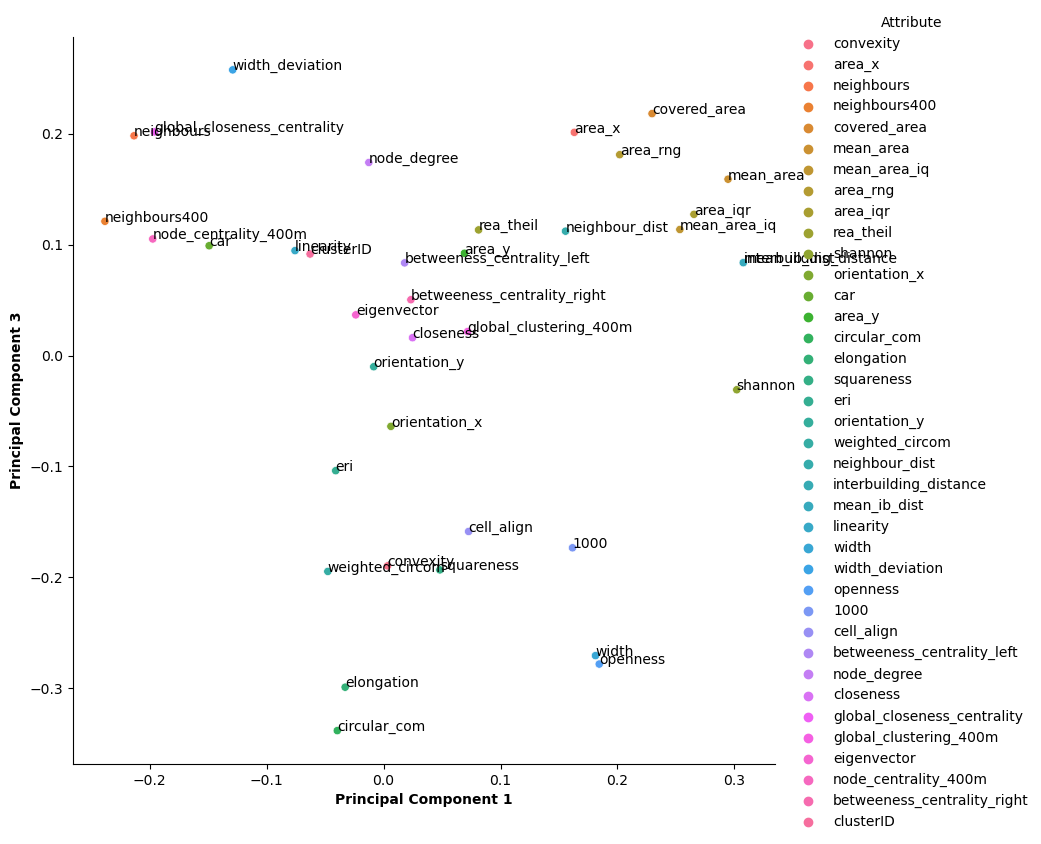

In [140]:
# Plotting the above dataframe with PC1 and PC3 to understand the components which explains inflation.

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

In [141]:
# Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=15)

In [142]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(tessellation_scaled)
df_inc_pca

array([[  8.64745831,   4.80966325,  -1.06383265, ...,   1.4014668 ,
          3.76336245,  -6.43441098],
       [  7.99272696,   3.62163942,  -0.23376057, ...,   1.45550548,
          1.61696818,  -2.6171451 ],
       [  5.69051427,   2.73534118,   1.53300499, ...,   2.08228994,
          0.71705893,  -0.76971401],
       ...,
       [ 23.009266  ,  12.902477  ,  -2.90199019, ...,  -1.42591452,
          2.61626558,   5.84451094],
       [ 51.40264562,  30.13907203, -31.18408431, ...,  -2.75364641,
         15.55565393, -25.07136381],
       [ 48.99653998,  26.22188971, -25.24635437, ...,  -4.016456  ,
         10.24974034, -10.8163164 ]])

In [143]:
# Creating new dataframe with Principal components


df_pca = pd.DataFrame(df_inc_pca, columns=[f"PC_{i+1}" for i in range(num_pc)])
df_pca_final = pd.concat([country, df_pca], axis=1)
df_pca_final.head()

,uID,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15
0,0,8.647458,4.809663,-1.063833,0.287391,3.475705,-1.056551,-4.222267,7.177258,-0.317338,5.189774,-1.586778,-1.647601,1.401467,3.763362,-6.434411
1,1,7.992727,3.621639,-0.233761,-0.843478,0.262356,-2.885293,-1.346048,1.967698,0.629692,1.202906,-2.714244,-2.423788,1.455505,1.616968,-2.617145
2,2,5.690514,2.735341,1.533005,-0.523147,0.474163,-2.548039,0.143652,1.908956,2.198908,2.071609,-1.440519,-1.724271,2.082290,0.717059,-0.769714
3,3,5.103632,1.472406,0.879376,0.284997,0.824350,-1.636529,1.314370,1.405051,0.595839,2.738324,0.164820,-1.378113,1.621666,-0.454886,-0.170784
4,4,3.591828,0.831162,0.915621,-0.651695,-0.702847,-3.203522,1.528513,-0.419892,1.876104,0.111319,-0.393260,-1.600306,0.678298,0.283037,0.687923


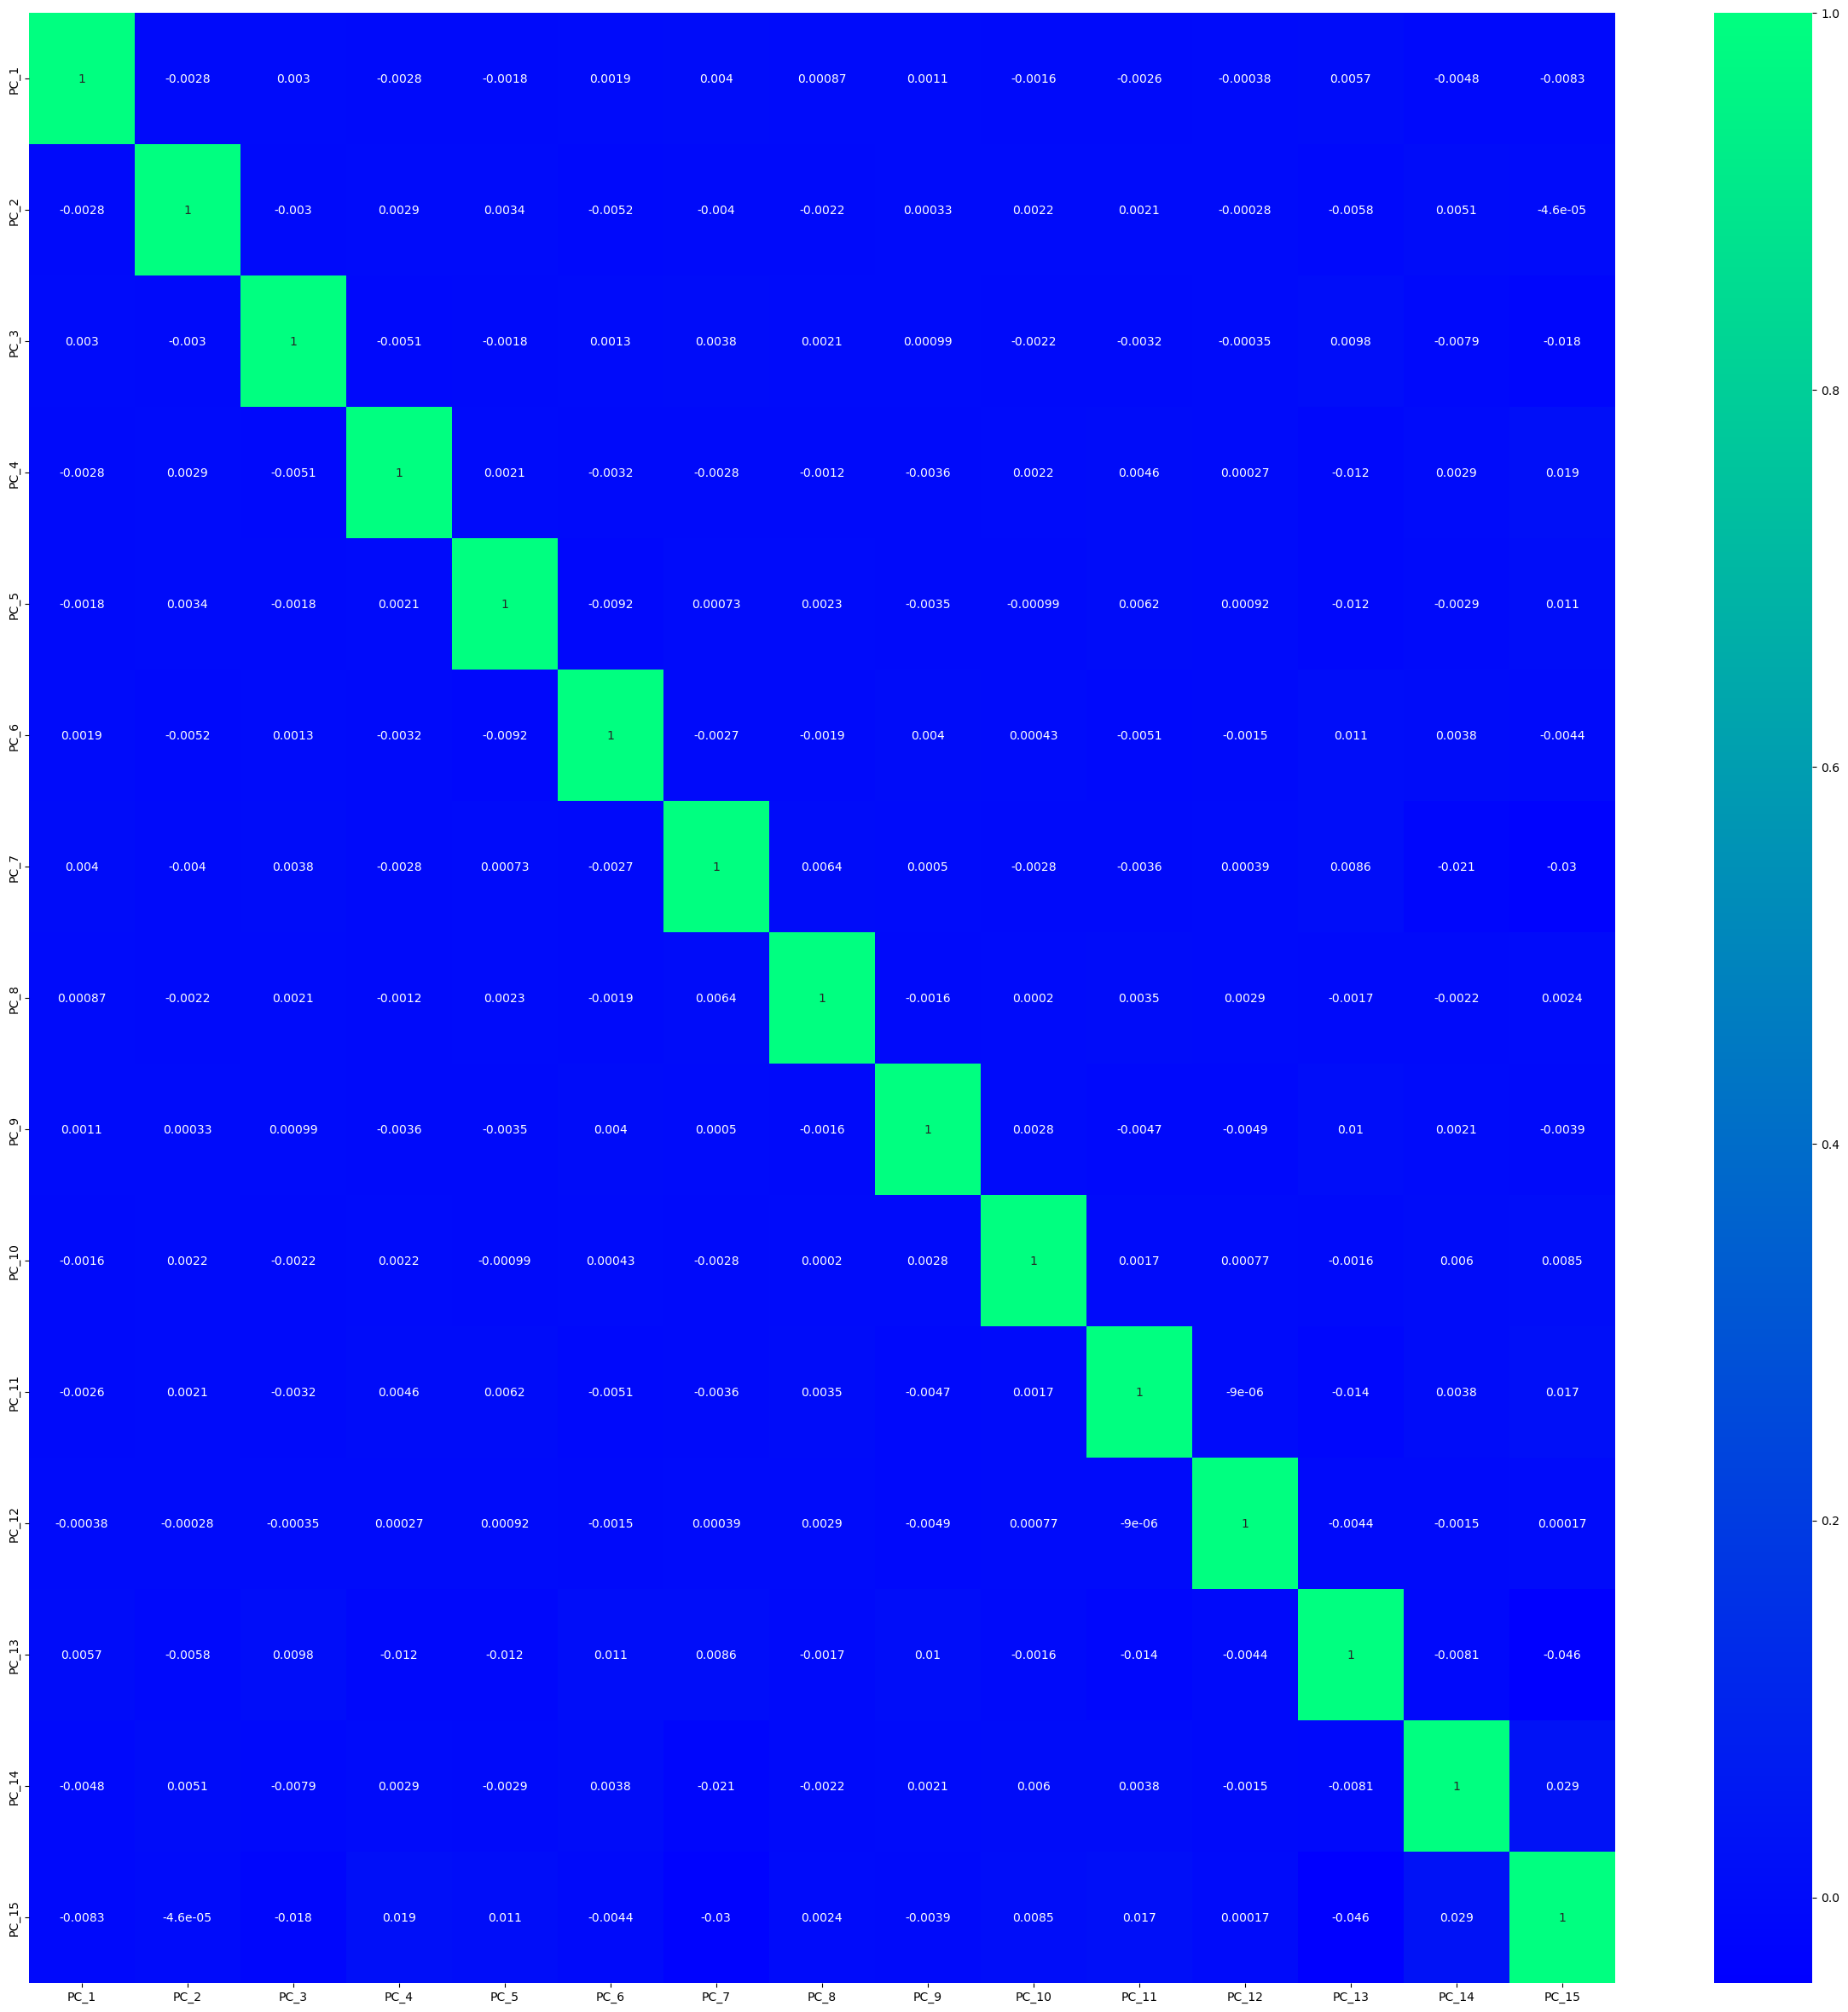

In [144]:
# Plotting Heatmap to check is there still dependency in the dataset.

plt.figure(figsize = (30,30))        
ax = sns.heatmap(df_pca_final.corr(),annot = True,cmap='winter')

As we can see from above heatmap that the correlation among the attributes is almost 0, we can proceed with this dataframe.

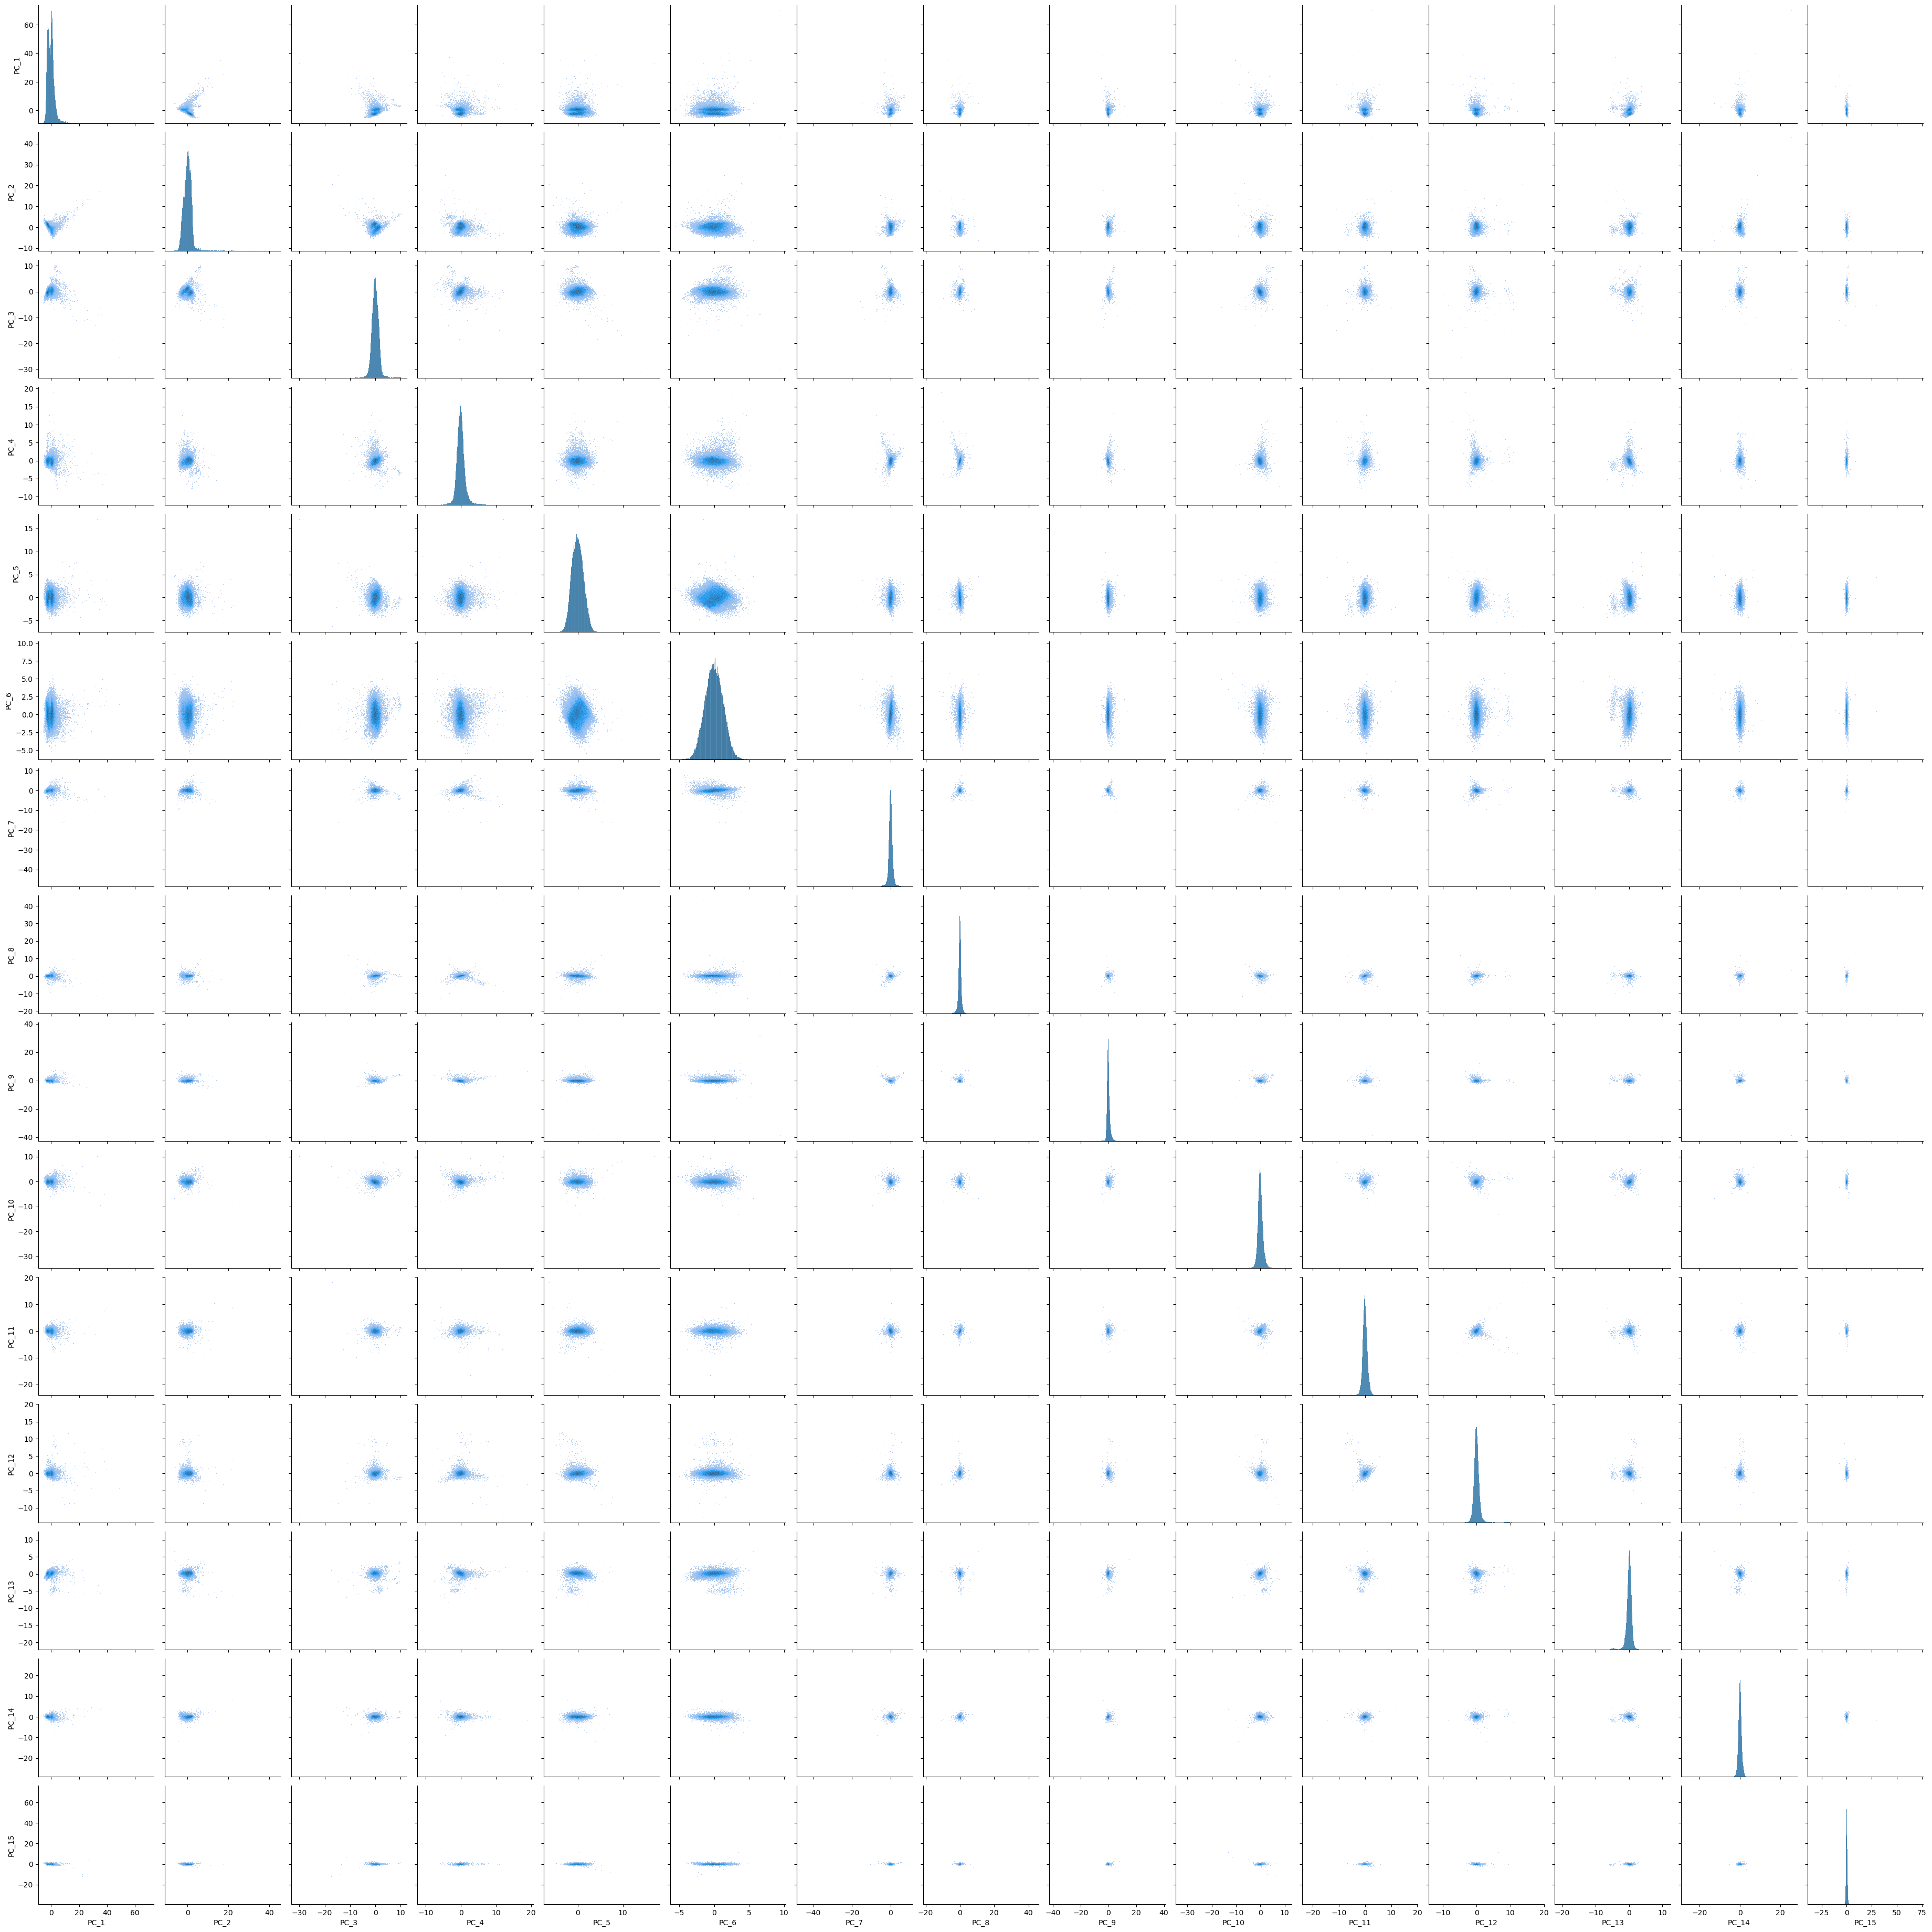

In [145]:
# Scatter Plot to visualize the spread of data across PCA components

sns.pairplot(data=df_pca_final, kind="hist")

## Outlier Analysis

Visualization each columns using violinplot

5 reasons why we used a violin graph over boxplot
- Violin graph is like box plot, but better
- Violin graph is like density plot, but much useful
- Violin graph is visually intuitive and attractive
- Violin graph is non-parametric
- There are many ways to use violin graphs

In [146]:
len(df_pca_final)

75039

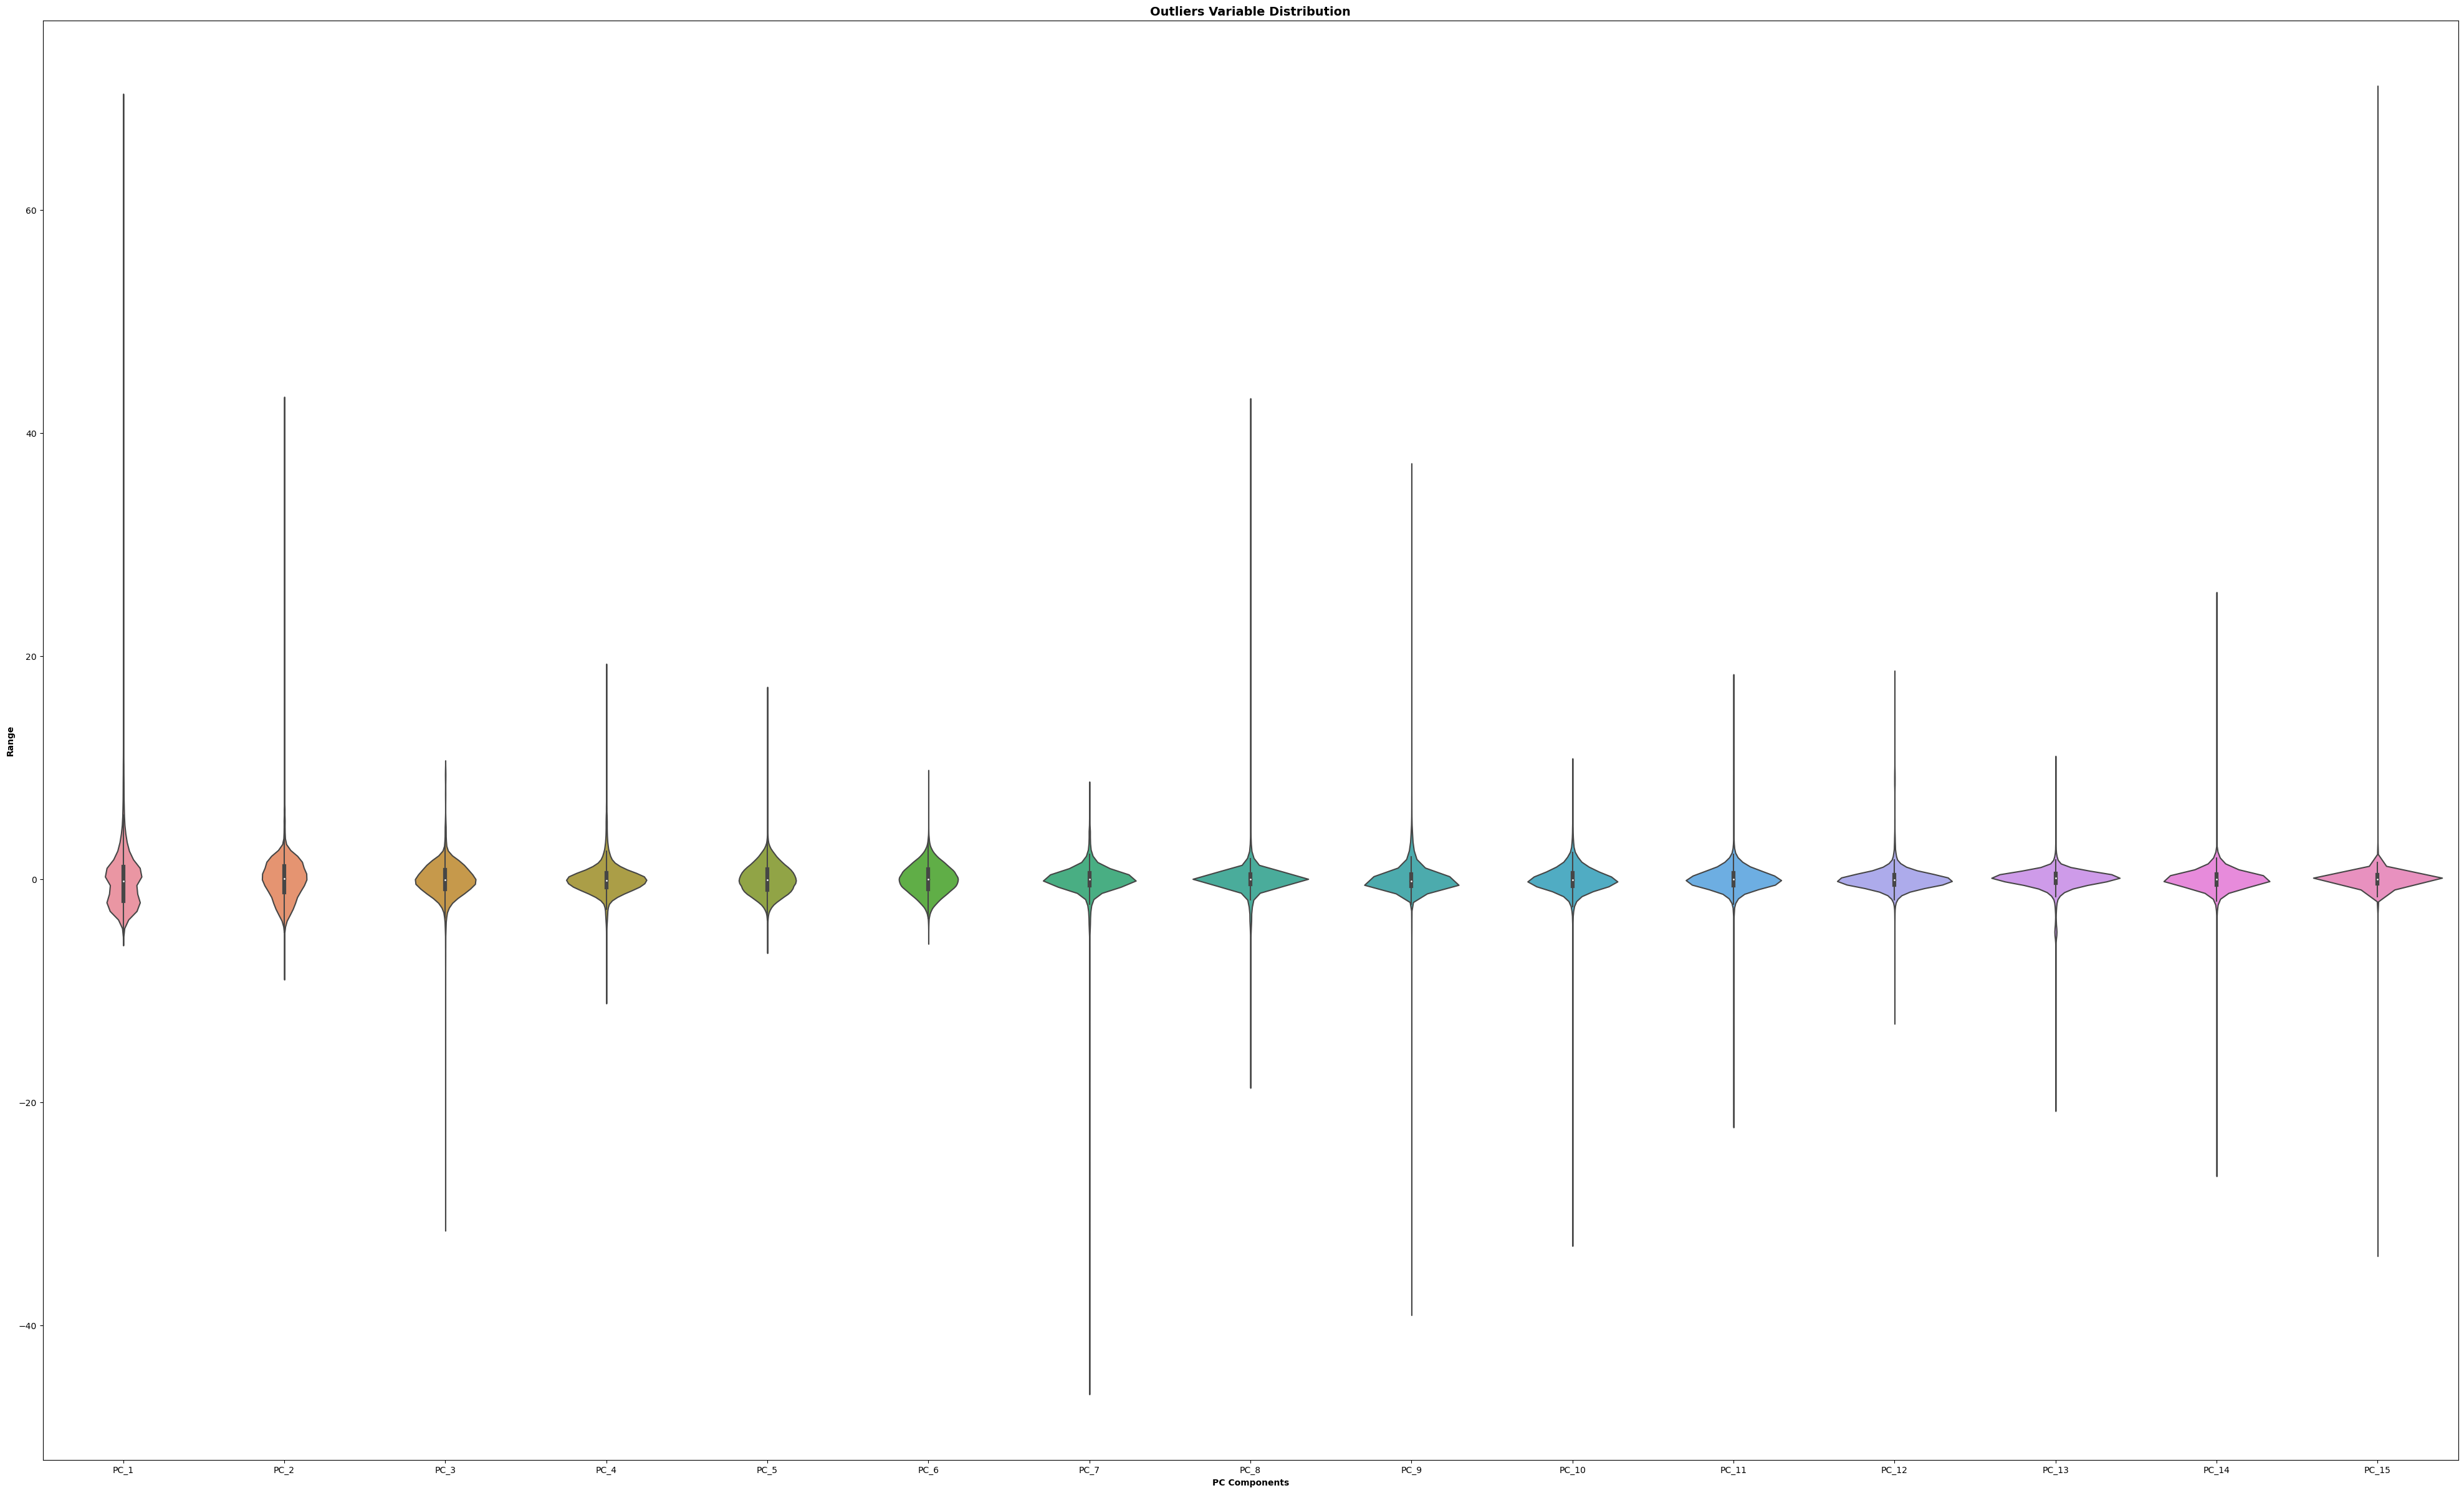

In [147]:
outliers = [f"PC_{i+1}" for i in range(num_pc)]
plt.rcParams['figure.figsize'] = [50,30]
sns.violinplot(data = df_pca_final[outliers])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
plt.show()

In [148]:
df_pca_final_minus_outliers = df_pca_final

In [149]:
# Loop over all PC components from PC_1 to PC_15
for i in range(1, 16):
    col_name = f'PC_{i}'
    # Calculate the quartiles and IQR for the current PC component
    Q1 = df_pca_final_minus_outliers[col_name].quantile(0.05)
    Q3 = df_pca_final_minus_outliers[col_name].quantile(0.95)
    IQR = Q3 - Q1
    # Apply the outlier treatment for the current PC component
    df_pca_final_minus_outliers = df_pca_final_minus_outliers[(df_pca_final_minus_outliers[col_name] >= Q1) & (df_pca_final_minus_outliers[col_name] <= Q3)]

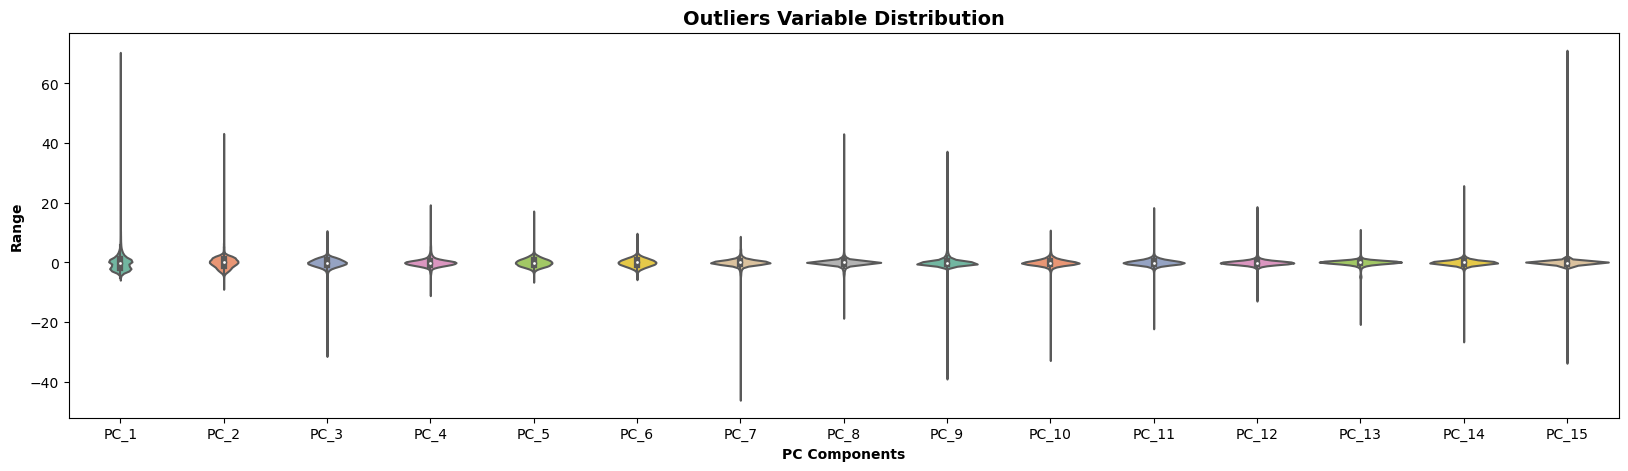

In [150]:
# Plot after Outlier removal 

outliers = [f"PC_{i+1}" for i in range(num_pc)]
plt.rcParams['figure.figsize'] = [20,5]
sns.violinplot(data = df_pca_final[outliers], orient="v", palette="Set2" )
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
plt.show()

In [151]:
# Reindexing the df after outlier removal

df_pca_final_minus_outliers = df_pca_final_minus_outliers.reset_index(drop=True)
df_pca_final_minus_outliers = df_pca_final_minus_outliers.drop(['uID'],axis=1)
df_pca_final_minus_outliers.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15
0,2.193465,-0.376304,1.855655,-0.982418,-0.260259,1.212171,0.377137,-0.124756,-0.143005,-1.037739,0.410773,-0.558285,0.808117,-0.733431,-0.250399
1,1.693969,-0.078304,1.487793,-0.127349,-1.914788,-0.558270,0.172812,-0.098598,-0.776041,-0.302672,-0.045945,-0.639966,0.706107,-0.683286,-0.821687
2,2.436923,0.275737,1.284025,-0.021088,-1.572691,-1.610331,0.732546,-0.158037,0.016209,-0.295854,-0.173750,-0.923480,0.787152,-0.645754,-0.638177
3,1.707479,-1.087937,1.130647,-0.838071,-1.320491,-1.323409,-0.185027,-0.241396,0.191777,-1.268347,-0.345919,-0.500269,0.502174,0.812521,-0.792011
4,1.436824,0.381080,1.560203,-0.247618,-1.216358,-1.277492,-0.194592,0.203317,-0.253356,-1.198823,-0.506340,-0.819391,0.613998,-0.585207,-0.667643


In [152]:
# Reindexing the df after outlier removal

df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_final_data = df_pca_final.drop(['uID'],axis=1)
df_pca_final.head()

,uID,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15
0,0,8.647458,4.809663,-1.063833,0.287391,3.475705,-1.056551,-4.222267,7.177258,-0.317338,5.189774,-1.586778,-1.647601,1.401467,3.763362,-6.434411
1,1,7.992727,3.621639,-0.233761,-0.843478,0.262356,-2.885293,-1.346048,1.967698,0.629692,1.202906,-2.714244,-2.423788,1.455505,1.616968,-2.617145
2,2,5.690514,2.735341,1.533005,-0.523147,0.474163,-2.548039,0.143652,1.908956,2.198908,2.071609,-1.440519,-1.724271,2.082290,0.717059,-0.769714
3,3,5.103632,1.472406,0.879376,0.284997,0.824350,-1.636529,1.314370,1.405051,0.595839,2.738324,0.164820,-1.378113,1.621666,-0.454886,-0.170784
4,4,3.591828,0.831162,0.915621,-0.651695,-0.702847,-3.203522,1.528513,-0.419892,1.876104,0.111319,-0.393260,-1.600306,0.678298,0.283037,0.687923


## Hopkins Statistics Test

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.
- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [153]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS


In [154]:
# Hopkins score
Hopkins_score=round(hopkins(df_pca_final_data),2)

In [ ]:
print("Hopkins_score".format(Hopkins_score))

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.[1] It belongs to the family of sparse sampling tests. It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed.[2] A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.[3]

# Model Building

In [ ]:
data = df_pca_final

In [ ]:
cgram = Clustergram(range(1, 20), n_init=100)
cgram.fit(data)

In [ ]:
ax = cgram.plot(figsize=(10, 8))
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

In [ ]:
fig, axs = plt.subplots(2, figsize=(10, 10), sharex=True)
cgram.silhouette_score().plot(xlabel="Number of clusters (k)", ylabel="Silhouette score", ax=axs[0])
cgram.calinski_harabasz_score().plot(xlabel="Number of clusters (k)", ylabel="Calinski-Harabasz score", ax=axs[1])
sns.despine(offset=10)

## K- means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

# Finding the Optimal Number of Clusters

### Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [ ]:
# # Elbow curve method to find the ideal number of clusters.
# ssd = []
# for num_clusters in list(range(1, num_pc)):
#     model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
#     model_clus.fit(df_pca_final_data)
#     ssd.append(model_clus.inertia_)

# plt.plot(ssd)

Looking at the above elbow curve it looks good to proceed with either 1 clusters.

## Silhouette Analysis

silhouette score=(p−q)/max(p,q)
 
**p**  is the mean distance to the points in the nearest cluster that the data point is not a part of

**q**  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
# # Silhouette score analysis to find the ideal number of clusters for K-means clustering

# range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# for num_clusters in range_n_clusters:
    
#     # intialise kmeans
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
#     kmeans.fit(df_pca_final_data)
    
#     cluster_labels = kmeans.labels_
    
#     # silhouette score
#     silhouette_avg = silhouette_score(df_pca_final_data, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [ ]:
# #K-means with k=7 clusters

# cluster7 = KMeans(n_clusters=7, max_iter=150, random_state= 50)
# cluster7.fit(df_pca_final_data)

In [ ]:
# # Cluster labels

# cluster7.labels_

In [ ]:

# # Assign the label

# df_pca_final['Cluster_Id'] = cluster7.labels_
# df_pca_final.head()

In [ ]:
# # Number of countries in each cluster

# df_pca_final['Cluster_Id'].value_counts()

It seems there are good number of countries in each clusters.

In [ ]:
# # Scatter plot on Principal components to visualize the spread of the data

# fig, axes = plt.subplots(1,2, figsize=(15,5))

# sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=df_pca_final,ax=axes[0])
# sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set2",data=df_pca_final,ax=axes[1])
# plt.show()

In [ ]:
# df_pca_final

We have visualized the data on the principal components and saw some good clusters were formed but some were not so good hence let's now visualize the data on the original attributes.

In [ ]:
# # Merging the df with PCA with original df

# df_merge = pd.merge(tessellation,df_pca_final,on='uID')
# list = tessellation.columns.tolist()
# list.append("Cluster_Id")
# df_merge_col = df_merge[list]

# df = []

# for column_name in tessellation.columns.tolist()[1:]:
#     df.append(pd.DataFrame(df_merge_col.groupby(["Cluster_Id"])[column_name].mean()))
    
# df_concat = pd.concat([pd.Series(range(7))] + df, axis=1)    
# df_concat.columns = ["Cluster_Id"] + tessellation.columns.tolist()[1:]
# df_concat.head()

In [ ]:
# df_merge_col.head()

From the business understanding we have learnt that **Child_Mortality, Income, Gdpp** are some important factors which decides the development of any country. We have also cross checked with Principal components and found that these variables have good score in PCA. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

In [ ]:
# # assuming you have a DataFrame called df_merge_col containing all the data,
# # and the x column is named 'Cluster_Id'

# # Get a list of all column names except for the x column
# y_columns = [col_name for col_name in df_merge_col.columns if col_name != 'Cluster_Id']

# # Set up the figure with subplots
# num_cols = 2
# num_rows = len(y_columns) // num_cols + (len(y_columns) % num_cols > 0)
# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, sharey=True)

# # Flatten the axes array to simplify indexing
# axes = axes.flatten()

# # Loop over all column names except for the x column
# for i, col_name in enumerate(y_columns):
#     # Create a violin plot for the current column
#     sns.violinplot(x='Cluster_Id', y=col_name, data=df_merge_col, ax=axes[i])
#     # Set the title for the current plot
#     axes[i].set_title(col_name)

# # Remove empty plots
# for i in range(len(y_columns), num_rows*num_cols):
#     fig.delaxes(axes[i])

# # Adjust spacing between subplots
# fig.tight_layout()

# # Show the plot
# plt.show()

## Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

- Divisive
- Agglomerative.

In [ ]:
# df_pca_final_data.head()

### Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

In [ ]:
# import sys
# sys.setrecursionlimit(10000)

In [ ]:
# df_pca_final_data

In [ ]:
# # Single linkage

# mergings = linkage(df_pca_final_data, method='single',metric='euclidean')
# dendrogram(mergings)
# plt.show()

### Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

In [ ]:
# # Complete Linkage

# mergings = linkage(df_pca_final_data, method='complete',metric='euclidean')
# dendrogram(mergings)
# plt.show()

In [ ]:
# df_pca_hc = df_pca_final.copy()
# df_pca_hc = df_pca_hc.drop('Cluster_Id',axis=1)
# df_pca_hc.head()

In [ ]:
# # Let cut the tree at height of approx 3 to get 4 clusters and see if it get any better cluster formation.

# clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
# df_hc = pd.concat([df_pca_hc, clusterCut], axis=1)
# df_hc.columns = ['uID'] + ['PC_' + str(i) for i in range(1, num_pc+1)] + ['Cluster_Id']

In [ ]:
# df_hc.head()

In [ ]:
# # Scatter plot on Principal components to visualize the spread of the data

# fig, axes = plt.subplots(1,2, figsize=(15,5))

# sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[0])
# sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[1])
# plt.show()

**We have analyzed both K-means and Hierarchial clustering and found clusters formed are not identical. The clusters formed in both the cases are not that great but its better in K-means as compared to Hierarchial. So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid**

In [ ]:
tessellation_raw['clusterID'] = cgram.labels[6].values

In [ ]:
# Map for comparison
f, ax = plt.subplots(figsize=(100, 100))
tessellation_raw.plot(ax=ax, column="clusterID", categorical=True, legend=True, cmap='Pastel1')
streets.plot(ax=ax, color='black')
buildings.plot(ax=ax, color='grey')
ax.set_axis_off()

In [ ]:
tessellation_raw.to_parquet(f"./out/{place}/tessellation_stats_final.pq")